In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment3.ipynb")

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-4:-Modeling-and-Optimization" data-toc-modified-id="Assignment-4:-Modeling-and-Optimization-1">Assignment 4: Modeling and Optimization</a></span></li><li><span><a href="#Questions-1-3:-Resource-Allocation-Problem" data-toc-modified-id="Questions-1-3:-Resource-Allocation-Problem-2">Questions 1-3: Resource Allocation Problem</a></span><ul class="toc-item"><li><span><a href="#Question-1:-Resource-Constraints" data-toc-modified-id="Question-1:-Resource-Constraints-2.1">Question 1: Resource Constraints</a></span><ul class="toc-item"><li><span><a href="#Question-1.a:-Modeling-Resource-Usage" data-toc-modified-id="Question-1.a:-Modeling-Resource-Usage-2.1.1">Question 1.a: Modeling Resource Usage</a></span></li><li><span><a href="#Question-1.b:--Resource-Usage-vs.-Total-Resource-Constraint" data-toc-modified-id="Question-1.b:--Resource-Usage-vs.-Total-Resource-Constraint-2.1.2">Question 1.b:  Resource Usage vs. Total Resource Constraint</a></span></li><li><span><a href="#Question-1.c:-Feasible-Region-Boundary" data-toc-modified-id="Question-1.c:-Feasible-Region-Boundary-2.1.3">Question 1.c: Feasible Region Boundary</a></span></li><li><span><a href="#Question-1.d:-Interior-of-Feasible-Region" data-toc-modified-id="Question-1.d:-Interior-of-Feasible-Region-2.1.4">Question 1.d: Interior of Feasible Region</a></span></li><li><span><a href="#Question-1.e:-Visualizing-the-Feasible-Region" data-toc-modified-id="Question-1.e:-Visualizing-the-Feasible-Region-2.1.5">Question 1.e: Visualizing the Feasible Region</a></span></li></ul></li><li><span><a href="#Question-2:-Objective-Function" data-toc-modified-id="Question-2:-Objective-Function-2.2">Question 2: Objective Function</a></span><ul class="toc-item"><li><span><a href="#Question-2.a:-Defining-Objective-Function" data-toc-modified-id="Question-2.a:-Defining-Objective-Function-2.2.1">Question 2.a: Defining Objective Function</a></span></li><li><span><a href="#Question-2.b:-Direction-of-Steepest-Increase" data-toc-modified-id="Question-2.b:-Direction-of-Steepest-Increase-2.2.2">Question 2.b: Direction of Steepest Increase</a></span></li></ul></li><li><span><a href="#Question-3:-Putting-Pieces-Together" data-toc-modified-id="Question-3:-Putting-Pieces-Together-2.3">Question 3: Putting Pieces Together</a></span><ul class="toc-item"><li><span><a href="#Question-3.a:-Standard-Form-of-a-Linear-Programming-Problem" data-toc-modified-id="Question-3.a:-Standard-Form-of-a-Linear-Programming-Problem-2.3.1">Question 3.a: Standard Form of a Linear Programming Problem</a></span></li><li><span><a href="#Question-3.b:-Computing-the-Numerical-Solution" data-toc-modified-id="Question-3.b:-Computing-the-Numerical-Solution-2.3.2">Question 3.b: Computing the Numerical Solution</a></span></li><li><span><a href="#Question-3.c:-Plotting-the-optimal-solution" data-toc-modified-id="Question-3.c:-Plotting-the-optimal-solution-2.3.3">Question 3.c: Plotting the optimal solution</a></span></li></ul></li></ul></li><li><span><a href="#Question-4:-Nutrition-Problem" data-toc-modified-id="Question-4:-Nutrition-Problem-3">Question 4: Nutrition Problem</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Question-4.a:-Define-Constraints" data-toc-modified-id="Question-4.a:-Define-Constraints-3.0.1">Question 4.a: Define Constraints</a></span></li><li><span><a href="#Question-4.b:-Create-Python-Variables" data-toc-modified-id="Question-4.b:-Create-Python-Variables-3.0.2">Question 4.b: Create Python Variables</a></span></li><li><span><a href="#Question-4.c:-Solve-the-Problem" data-toc-modified-id="Question-4.c:-Solve-the-Problem-3.0.3">Question 4.c: Solve the Problem</a></span></li><li><span><a href="#Question-4.d:-Interpreting-the-Results" data-toc-modified-id="Question-4.d:-Interpreting-the-Results-3.0.4">Question 4.d: Interpreting the Results</a></span></li></ul></li></ul></li></ul></div>

# Assignment 3: Modeling and Optimization

Mathematical modeling of a problem at hand give us a systematic way of finding a solution. For example, a maximum likelihood estimator (assuming it exists), $\hat\theta$, is a method for finding the parameter that maximizes the likelihood of the data $L_n$:
$$L_{n}(\hat{\theta} ; x_1, x_2, \dots, x_n)=\max _{\theta \in \Theta} L_{n}(\theta ; x_1, x_2, \dots, x_n)$$
Data $x_1, x_2, \dots$, set of feasible parameters $\Theta$, and likelihood function $L_n$ are given. We find the parameter that "best" describe the data in the context of the likelihood function.

Many other applications of optimization exists, and this assignment will give a hands-on introduction to a simple linear programming problem.

In [2]:
#!pip install cvxpy

In [3]:
import cvxpy as cp
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<!-- BEGIN QUESTION -->

# Questions 1-3: Resource Allocation Problem

Hint: refer to Chapter 2.B of [Introduction to Linear and Matrix Algebra](https://search.library.ucsb.edu/permalink/01UCSB_INST/1876c7q/cdi_springer_books_10_1007_978_3_030_52811_9) for examples.

You are in charge of a company that makes two hot sauces: $x_1$ liters of Kapatio and $x_2$ liters of Zriracha. We will use optimization technique to find the "best" manufacturing strategy given our resource constraints.

First, we need to define what we mean by "best" strategy. In this scenario, the goal is to obtain the highest revenue possible. While doing so, there are resource constraints we must satisfy. 


For example, in order to manufacture these two hot sauce products, different amount of peppers and vineger are needed. Also, we have only so much total resource available.

Ingridients | Kapatio | Zriracha | Total Available
----------- | ------- | -------- | ------------------
Pepper      | 5       | 7        | 30
Vineger     | 4       | 2        | 12

## Question 1: Resource Constraints

### Question 1.a: Modeling Resource Usage

What is the equation for the amount of pepper needed to manufacture $x_1$ and $x_2$. What is the equation for the amount of vinegar?
(Use [Mathpix](https://mathpix.com/) to write equations)

<!--
BEGIN QUESTION
name: q1a
manual: true
points: 4
-->

$x_1$ is liters of Kapatio produced, $x_2$ is liters of Zriracha produced.

Amount of pepper needed = $5x_1 + 7x_2$

Amount of vinegar needed = $4x_1 + 2x_2$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.b:  Resource Usage vs. Total Resource Constraint

Total amount of pepper needed cannot exceed total available. Write down the inequality expressing this relationship. Do the same for vinegar. These inequalities are your resource constraints.
Additinally, variables $x_1$ and $x_2$ are non-negative: i.e. amount of manufactured goods cannot be negative.

Rewrite the system of constraint inequalities into a matrix inequality: $Ax\leq b$, where $x=(x_1, x_2)^T$. Arrange rows of $A$ and $b$ such that:

* Row 1: total pepper amount constraint
* Row 2: total vinegar amount constraint
* Row 3: Kapatio non-negativity constraint
* Row 4: Zriracha non-negativity constraint

Less than symbol in $Ax\leq b$ means element-wise.

<!--
BEGIN QUESTION
name: q1b1
manual: true
points: 4
-->

Pepper constraint: $5x_1 + 7x_2 \leq 30$

Vinegar constraint: $4x_1 + 2x_2 \leq 12$

$x_1\geq 0$, $x_2\geq 0$

<!-- END QUESTION -->

Define matrix `A1` and vector `b1` according to matrix inequality above.

<!--
BEGIN QUESTION
name: q1b2
manual: false
points: 4
-->

In [4]:
A1 = np.array([[5,7],
     [4,2],
     [-1,0],
     [0,-1]])
b1 = np.array([30,12,0,0])

In [5]:
grader.check("q1b2")

q1b2 passed!

### Visualizing Feasible Region <a class="tocSkip">
In a 2-dimensional plot, we will visualize the area that satisfies both of the resource constraints. Draw $x_1$ on the horizontal axis and $x_2$ on the vertical axis. 

There will be two main components to the plot:
* **Lines** indicating constraint boundaries:  
    e.g. the constraint $x_2\geq 0$ has boundary at $x_2 = 0$.
* **Shaded area** indicating feasible regions:  
    e.g., the whole region $x_2 > 0$ is to be shaded _if_ $x_2\geq 0$ was the only constraint. We will use shading to indicate the region where _all_ constraints are satisfied.

In [6]:
x1_line = np.linspace(-1, 10, 500)
x2_line = np.linspace(-1, 10, 500)

### Question 1.c: Feasible Region Boundary

In a list named `boundary`, create four data frames for each equality in $Ax=b$. These lines indicate where the feasible area ends. Set column names as

* `$x_1$`
* `$x_2$`
* `constraints`

Note the use of latex codes (feel free to use [Mathpix](https://mathpix.com/)). 

#### Toy Example: Drawing Boundaries <a class="tocSkip">

Here is a **toy example** of drawing two constraint boundaries by constructing data frames:

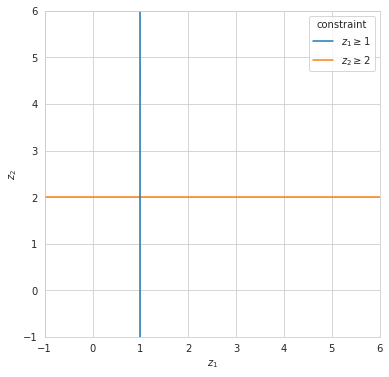

In [7]:
z1_line = np.linspace(-1, 10, 500)
z2_line = np.linspace(-1, 10, 500)

boundary = [
    pd.DataFrame({
        '$z_1$': np.ones_like(z2_line)*1,
        '$z_2$': z2_line,
        'constraint': '$z_1\geq 1$'
    }),
    pd.DataFrame({
        '$z_1$': z1_line,
        '$z_2$': np.ones_like(z1_line)*2,
        'constraint': '$z_2\geq 2$'
    }),
]
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(x='$z_1$', y='$z_2$', hue='constraint', data=pd.concat(boundary).reset_index(), ax=ax).axvline(1)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

<!-- BEGIN QUESTION -->

Sometimes, things just do not work as expected. 

In the toy example code, 
```
sns.lineplot(x='$z_1$', y='$z_2$', hue='constraint', data=pd.concat(boundary), ax=ax).axvline(1)
```
what seems strange about the plotting command? Why was the strange code necessary?

<!--
BEGIN QUESTION
name: q1c1
manual: true
points: 4
-->

This code looks fine other than the specification of axvline(1). Within constraint, this line is already defined so it is strange that we had to specify this. This was necessary because the line does not appear without axvline(1).

<!-- END QUESTION -->



#### Example: Resource Constraint Boundary  <a class="tocSkip">

Now, create a data frame for the non-negativity constraint $x_2\geq 0$ as follows:

In [8]:
pd.DataFrame({'$x_1$':x1_line,               ## x_1 can take on any value
              '$x_2$':x1_line * 0.0,         ## x_2 = 0
              'constraint':'$x_2 \geq 0$'}), ## constraint equation for labeling

(         $x_1$  $x_2$    constraint
 0    -1.000000   -0.0  $x_2 \geq 0$
 1    -0.977956   -0.0  $x_2 \geq 0$
 2    -0.955912   -0.0  $x_2 \geq 0$
 3    -0.933868   -0.0  $x_2 \geq 0$
 4    -0.911824   -0.0  $x_2 \geq 0$
 ..         ...    ...           ...
 495   9.911824    0.0  $x_2 \geq 0$
 496   9.933868    0.0  $x_2 \geq 0$
 497   9.955912    0.0  $x_2 \geq 0$
 498   9.977956    0.0  $x_2 \geq 0$
 499  10.000000    0.0  $x_2 \geq 0$
 
 [500 rows x 3 columns],)

Create a list named `boundary` containing four data frames (each corresponding to a constraint). Concatenate data frames in `boundary` to one data frame named `hull`.

<!--
BEGIN QUESTION
name: q1c2
manual: false
points: 6
-->

In [9]:
boundary = [
    pd.DataFrame({'$x_1$': (30 - 7 * x1_line) / 5,
                  '$x_2$': x2_line,
                  'constraint':'$5 x_1 + 7 x_2 \leq 30$'}),
    pd.DataFrame({'$x_1$': (12 - 2 * x1_line) / 4,
                  '$x_2$': x2_line,
                  'constraint':'$4 x_1 + 2 x_2 \leq 12$'}),
    pd.DataFrame({'$x_1$': x2_line* 0.0, 
                  '$x_2$': x2_line,
                  'constraint':'$x_1\geq 0$'}),
    pd.DataFrame({'$x_1$':x1_line,
                  '$x_2$':x1_line * 0.0,
                  'constraint':'$x_2\geq 0$'})
]
hull = pd.concat(boundary)

'''
pd.DataFrame({'$x_1$': (30 - 5 * x1_line) / 7,
                  '$x_2$': x2_line,
                  'constraint':'$5 x_1 + 7 x_2 \leq 30$'}),
    pd.DataFrame({'$x_1$': (12 - 4 * x1_line) / 2,
                  '$x_2$': x2_line,
'''

"\npd.DataFrame({'$x_1$': (30 - 5 * x1_line) / 7,\n                  '$x_2$': x2_line,\n                  'constraint':'$5 x_1 + 7 x_2 \\leq 30$'}),\n    pd.DataFrame({'$x_1$': (12 - 4 * x1_line) / 2,\n                  '$x_2$': x2_line,\n"

In [10]:
grader.check("q1c2")

q1c2 passed!

### Question 1.d: Interior of Feasible Region

Previous question prepared constraint boundaries, $Ax = b$. In this question, we calculate the interior of the feasible region, which will be shaded in the visualization. First, create a 2-d array of $x_1$ and $x_2$ values. If a point $(x_1, x_2)$ satisfies _every_ constraint, the point will be colored grey.

For example, in order to shade $\{x_1: x_1\geq 1\}\cap\{x_2: x_2\geq 2\}$, we can use the `imshow` method. 

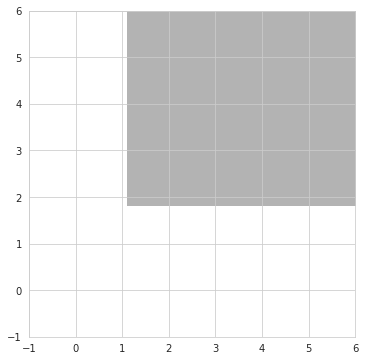

In [11]:
z1_line = np.linspace(-1, 6, 10)
z2_line = np.linspace(-1, 6, 10)
z1_grid, z2_grid = np.meshgrid(z1_line, z2_line)

fig, az = plt.subplots(figsize=(6, 6))
az.imshow(
    ((z1_grid >= 1) & (z2_grid >= 2)).astype(int),
    origin='lower',
    extent=(z1_grid.min(), z1_grid.max(), z2_grid.min(), z2_grid.max()),
    cmap="Greys", alpha=0.3, aspect='equal' 
)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

<!-- BEGIN QUESTION -->

By dissecting the command below and reading the documentation, report what each of the following lines does:

* `((y1_grid >= 1) & (y2_grid >= 2)).astype(int)` (What is the output of running this command?)  
* `origin='lower'`  
* `extent=(y1_grid.min(), y1_grid.max(), y2_grid.min(), y2_grid.max())`  
* `cmap='Greys'`  
* `alpha=0.3`  
* `aspect='equal'`  

<!--
BEGIN QUESTION
name: q1d1
manual: true
points: 6
-->

In [12]:
print(z1_grid[1])

[-1.         -0.22222222  0.55555556  1.33333333  2.11111111  2.88888889
  3.66666667  4.44444444  5.22222222  6.        ]


Line 1 - This line outputs an array of the same shape of y1_grid and y2_grid with 1s when y1_grid value is $\geq1$ and y2_grid value is $\geq2$, 0 otherwise. This is the data to be plotted.

Line 2 - Moves the [0,0] index to the lower left of the matrix. Default is upper.

Line 3 - Determines the bounds of the image, (left, right, bottom, top). Sets the bounds of the visualization to include only y1_grid x and y2_grid y values.

Line 4 - Sets the color map to be greys, the shaded region will be grey.

Line 5 - Sets a blending value to make the plot closer to transparent than opaque.

Line 6 - Sets aspect ratio to be equal so that the plot is a square. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.e: Visualizing the Feasible Region

Finally, create a figure that shows constraint boundaries and the interior region shaded with a light grey color.

Your output will look like this:  
![hull](images/feasible.png)

<!--
BEGIN QUESTION
name: q1e1
manual: true
points: 8
-->

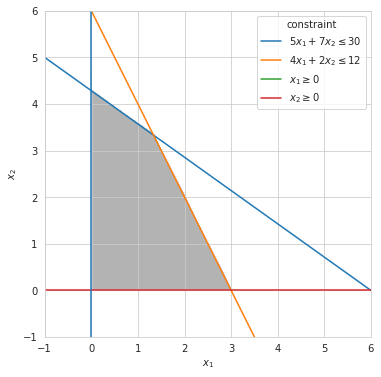

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
x1_grid, x2_grid = np.meshgrid(x1_line, x2_line)

ax.imshow(
    (
        ((x1_grid >= 0) & (x2_grid >= 0) & (x2_grid <= (30 - 5 * x1_grid) / 7) & (x2_grid <= (12 - 4 * x1_grid) / 2)).astype(int)
    ),
    origin='lower',
    extent=(x1_grid.min(), x1_grid.max(), x2_grid.min(), x2_grid.max()),
    cmap="Greys", alpha = 0.3, aspect='equal')


# ax = sns.lineplot(???).axvline(???)
ax = sns.lineplot(x='$x_1$', y='$x_2$', hue='constraint', data=pd.concat(boundary).reset_index(), ax=ax).axvline(0)

plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

In the context of linear programming, $Ax\leq b$ is called the _feasible region_ (including the appropriate sections of the boundaries). Denote the (shaded) feasible region as set $C$. Points $(x_1,x_2)\in C$ satisfy all of the constraints.

Describe in plain words the feasible region in the context of hot sauce manufacturing. Specifically, which constraint is violated (if any) by a point at:

* $(x_1,x_2) = (4, 1)$
* $(x_1,x_2) = (0, 5)$  
* $(x_1,x_2) = (3, 4)$  

<!--
BEGIN QUESTION
name: q1e2
manual: true
points: 6
-->

The constraints are listed above on the legend. 

$(x_1,x_2) = (4, 1)$ violates the constraint $4x_1 + 2x_2 \leq 12$.

$(x_1,x_2) = (0, 5)$ violates the constraint $5x_1 + 7x_2 \leq 30$.

$(x_1,x_2) = (3, 4)$ violates both constraints $4x_1 + 2x_2 \leq 12$ and $5x_1 + 7x_2 \leq 30$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2: Objective Function

### Question 2.a: Defining Objective Function

Suppose the hot sauces are sold at the same price: \\$5 per liter. 

What is the equation $f(x)$ for the total revenue as a function of $x_1$ and $x_2$? 

The function $f(x)$ is called the objective function.

<!--
BEGIN QUESTION
name: q2a1
manual: true
points: 4
-->

Consider the objective function $f(x) = 5x_1 + 5x_2$.

<!-- END QUESTION -->

Objective function $f(x)$ is a linear function in $x$. Therefore, $f(x)$ is a 2-dimesional hyperplane. Note that each value of $f(x)$ defines a line in $(x_1, x_2)$ plane.

For example, $f(x)= 0 = c_1x_1 + c_2x_2$ defines a line. A subspace of equal function value is sometimes referred to as a _level set_ or a _contour line_ when visualized.

First, create a numpy array of prices `c` for the two hot sauces, $x_1$ and $x_2$. Then, create a list `f_vals` containing four data frames of contour lines, $f(x) \in \{0, 10, 20, 30\}$. by creating one data frame for each contour line. 

<!--
BEGIN QUESTION
name: q2a2
manual: false
points: 4
-->

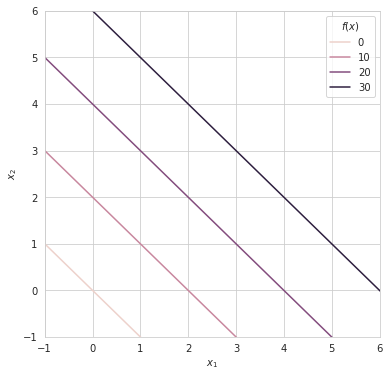

In [14]:
c = np.array((5,5))

fig, ax = plt.subplots(figsize=(6, 6))
contours = [
    pd.DataFrame({
        '$x_1$': x1_line,
        '$x_2$': ( 0 - c[0]*x1_line)/c[1],
        '$f(x)$': 0
    }),
    pd.DataFrame({
        '$x_1$': x1_line,
        '$x_2$': ( 10 - c[0]*x1_line)/c[1],
        '$f(x)$': 10
    }),
    pd.DataFrame({
        '$x_1$': x1_line,
        '$x_2$': ( 20 - c[0]*x1_line)/c[1],
        '$f(x)$': 20
    }),
    pd.DataFrame({
        '$x_1$': x1_line,
        '$x_2$': ( 30 - c[0]*x1_line)/c[1],
        '$f(x)$': 30
    }),
]
f_vals = pd.concat(contours)

# print(f_vals)
# ax = sns.lineplot(???)
ax = sns.lineplot(data = f_vals.reset_index(), x = '$x_1$', y = '$x_2$', hue = '$f(x)$')

plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

In [15]:
grader.check("q2a2")

q2a2 passed!

<!-- BEGIN QUESTION -->

### Question 2.b: Direction of Steepest Increase

Since we want to maximize revenue, we want to increase our objective function as much as possible. Analogous to the minimization example given in a previous lecture, we can repeatedly move in the direction of function increase. In order to determine such direction, compute the gradient of $f(x)$ at $x=(0,0)^T$:
$$\nabla_x f(x) = \begin{pmatrix}\frac{\partial f(x)}{\partial x_1}\\\frac{\partial f(x)}{\partial x_2}\end{pmatrix} $$

<!--
BEGIN QUESTION
name: q2b
manual: true
points: 4
-->

$$\nabla_x f(x) = \begin{pmatrix}\frac{\partial f(0)}{\partial x_1}\\\frac{\partial f(0)}{\partial x_2}\end{pmatrix} = \begin{pmatrix}{5}\\{5}\end{pmatrix}$$


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 3: Putting Pieces Together

### Question 3.a: Standard Form of a Linear Programming Problem

Write down the so-called the _standard form_ of a linear programming problem:
$$\begin{aligned}
\max_x & f(x)\\
\text{subject to } & Ax\leq b
\end{aligned}$$

Specifically, write the obejective as an inner product of two vectors: $f(x) = c^T x$, and write the constraint as a vector inequality involving a matrix-vector prduct: $Ax\leq b$, where $A$ is a 4-by-2 matrix.

<!--
BEGIN QUESTION
name: q3a
manual: true
points: 4
-->

$$
\begin{aligned}
\max_x & f(x) = c^T x\\
\text{subject to } & Ax\leq b\\
c^T = \begin{pmatrix}
5 & 5
\end{pmatrix} \\
A = \begin{pmatrix}
5 & 7\\
4 & 2\\
-1 & 0\\
0 & -1
\end{pmatrix} \\
b^T = \begin{pmatrix}
30 & 12 & 0 & 0
\end{pmatrix}
\end{aligned}
$$

<!-- END QUESTION -->

### Question 3.b: Computing the Numerical Solution

Therefore, _maximizing_ the revenue is a search over the feasible region for the best point $x^*=(x_1^*, x_2^*)$ that gives the largest revenue. On the otherhand, any _infeasible_ point _not_ in the feasible region cannot be a solution to the constrained optimization problem.

Notationally, the following expression means the same thing:
$$x^* = \arg\max_{\{x: Ax\leq b\}} f(x)$$

Using [CVXPY](https://www.cvxpy.org/), solve for the resource allocation problem with constraints.

<!--
BEGIN QUESTION
name: q3b
manual: false
points: 4
-->

In [16]:
# define variables
x = cp.Variable(2)
A1 = np.array([[5,7],
     [4,2],
     [-1,0],
     [0,-1]])
b1 = np.array([30,12,0,0])

# define constraints
constraints = [A1 @ x <= b1]

# form objective
obj = cp.Maximize(c @ x)

# define the linear program
problem = cp.Problem(obj, constraints)

fstar1 = problem.solve()                                                 # maximum attained function value
xstar1 = pd.DataFrame(x.value.reshape(1, 2), columns=['$x_1$', '$x_2$']) # maximizer x for f

In [17]:
grader.check("q3b")

q3b passed!

<!-- BEGIN QUESTION -->

### Question 3.c: Plotting the optimal solution

<!--
BEGIN QUESTION
name: q3c
manual: true
points: 4
-->

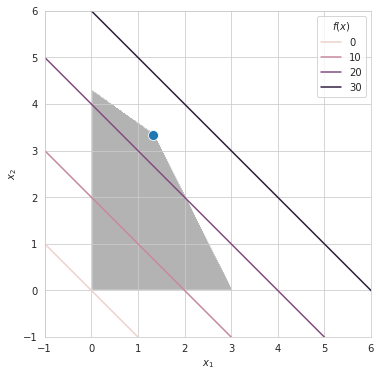

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
x1_grid, x2_grid = np.meshgrid(x1_line, x2_line)
ax.imshow(
    (
        (A1[0,0]*x1_grid + A1[0,1]*x2_grid <= b1[0]) & # Pepper constraints
        (A1[1,0]*x1_grid + A1[1,1]*x2_grid <= b1[1]) & # Vinegar constraints
        (A1[2,0]*x1_grid + A1[2,1]*x2_grid <= b1[2]) & 
        (A1[3,0]*x1_grid + A1[3,1]*x2_grid <= b1[3])   # non-negativity constraints 
    ),
    origin='lower',
    extent=(x1_grid.min(), x1_grid.max(), x2_grid.min(), x2_grid.max()),
    cmap="Greys", alpha = 0.3, aspect='equal' 
)
sns.scatterplot(x='$x_1$', y='$x_2$', data=xstar1, ax=ax, s=100)
sns.lineplot(x='$x_1$', y='$x_2$', hue='$f(x)$', data=f_vals.reset_index(), ax=ax)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

<!-- END QUESTION -->



# Question 4: Nutrition Problem

During the second world war, the US Army set out to save money without damaging the nutritional health of members of the armed forces. 

> According to [this source](https://ibmdecisionoptimization.github.io/docplex-doc/mp/diet.html), the following problem is a _simple variation of the well-known diet problem that was posed by George Stigler and George Dantzig: how to choose foods that satisfy nutritional requirements while minimizing costs or maximizing satiety._
> 
> _Stigler solved his model "by hand" because technology at the time did not yet support more sophisticated methods. However, in 1947, Jack Laderman, of the US National Bureau of Standards, applied the simplex method (an algorithm that was recently proposed by George Dantzig) to Stigler’s model. Laderman and his team of nine linear programmers, working on desk calculators, showed that Stigler’s heuristic approximation was very close to optimal (only 24 cents per year over the optimum found by the simplex method) and thus demonstrated the practicality of the simplex method on large-scale, real-world problems._
> 
> _The problem that is solved in this example is to minimize the cost of a diet that satisfies certain nutritional constraints._

The file `foods.csv` contains calorie, nutritional content, serving size, and price per serving information about 64 foods. Read it into a data frame named `foods`.

In [19]:
foods = pd.read_csv("files/foods.csv")
# print(foods)

The file `nutritional_constraints.csv` contains healthy nutritional range constraints. Minimum and maximum allowed nutritional contents can be found in this file. Name the variable `requirements`.

In [20]:
requirements = pd.read_csv("files/nutritional_constraints.csv")
#print(requirements)

Extract the nutritional content of foods into a 2-d array named `ncontent`.

In [21]:
ncontent = np.transpose(foods.iloc[:,1:12])
#print(ncontent)

<!-- BEGIN QUESTION -->

### Question 4.a: Define Constraints

To avoid eating the same foods, limit each food intake to be 2 or less. Also, one cannot consume less than zero servings. Furthermore, apply the nutritional constraints as specified in `nutritional_constraints.csv` (assume that the units are the same as food nutritional contents)

Note that a range constraints, e.g., $2000 \leq \text{total calories} \leq 2250$, can be written as two constraints: $\text{total calories} \leq 2250$ and $-\text{total calories} \leq -2000$. Hence, we can rewrite caloric intake constraints as
$$\begin{aligned}
-(\text{calories in frozen broccoli})x_0 - (\text{calories in raw carrots})x_1 - \dots - (\text{calories in bean bacon soup, w/watr})x_{63} = -c^T x&\leq -2000\\
  \text{calories in frozen broccoli})x_0 + (\text{calories in raw carrots})x_1 + \dots + (\text{calories in bean bacon soup, w/watr})x_{63} = c^T x&\leq 2250\\
\end{aligned}$$
where vector $c$ contains calorie information for all 64 foods and $x$ containts servings consumed of each food. Matrix $U$ and vector $w$ would be such that
$$\begin{aligned}
U=
\begin{pmatrix}
-c^T\\
c^T
\end{pmatrix}
\text{ and }
w = \begin{pmatrix}
-2000\\
2250
\end{pmatrix}
\end{aligned},$$
and the matrix-vector inequality would be $Ux\leq w$. Range constraints of each food can be implemented similarly with identity matrices.

Denote nutritional content information from `foods` data frame as $A$ and denote the `Min` and `Max` columns of `requirements` as vector $b_L$ and $b_U$, respectively. Construct $M$ and $d$ in $M x \leq d$ using $I$ (identity matrix), $A$, $b_L$, $b_U$, and other constants, so that all the range constraints are expressed in $M x\leq d$. (This is a theory question. No coding is involved)

<!--
BEGIN QUESTION
name: q4a
manual: true
points: 4
-->

$$
\begin{aligned}
M = \begin{pmatrix}
-1 \\
1 \\
-A \\
A 
\end{pmatrix}  
d = \begin{pmatrix}
0 \\
2 \\
-b_L \\
b_U 
\end{pmatrix}
\end{aligned}
$$

<!-- END QUESTION -->

### Question 4.b: Create Python Variables

Denote the servings of each food as $x_i$ where $i$ is the row index of each food in `foods` data frame: i.e. $x_0$ indicates number of servings of frozen broccoli, $x_1$ indicates that of raw carrots, etc.

* Create cost vector `cost` that gives per serving cost. 
* Create matrix `M` and `d` that lists nutritional content in the following order:
    * Non-negativity constraint of food consumed: i.e. 0 servings or more
    * Upper limit on food consumed: i.e. 2 servings or less
    * Lower limit on consumption of each nutrition: i.e. following `Min` column
    * Upper limit on consumption of each nutrition: i.e. following `Max` column
    
<!--
BEGIN QUESTION
name: q4b
manual: false
points: 4
-->

In [22]:
M = np.concatenate([
    np.identity(64) * -1,
    np.identity(64),
    np.transpose(-1 * foods.iloc[:,1:12]),
    np.transpose(foods.iloc[:,1:12])
])

d = np.concatenate([
    np.repeat(float(0),64),
    np.repeat(float(2),64),
    -1 * requirements['Min'],
    requirements['Max']])

cost = foods['Price/Serving ($)']
print(cost)
print(cost.shape)
print(ncontent.shape)

0     0.16
1     0.07
2     0.04
3     0.18
4     0.02
      ... 
59    0.75
60    0.39
61    0.99
62    0.65
63    0.67
Name: Price/Serving ($), Length: 64, dtype: float64
(64,)
(11, 64)


In [23]:
grader.check("q4b")

q4b passed!

### Question 4.c: Solve the Problem

Create cvxpy variable `servings` to represent the number of servings of food, and use cvxpy to solve for the optimal solution. 

Choose [ECOS as your solver](https://www.cvxpy.org/tutorial/advanced/index.html?highlight=osqp#choosing-a-solver).

<!--
BEGIN QUESTION
name: q4c
manual: false
points: 4
-->

In [24]:
#servings @ np.transpose(cost)
#cost @ servings

In [25]:
servings = cp.Variable(64)

objective = cp.Minimize(servings @ np.transpose(cost))

constraint = [M @ servings <= d]

# define the linear program
nutrition_problem = cp.Problem(cp.Minimize(servings @ np.transpose(cost)), [M @ servings <= d])

#nutrition_problem = cp.Problem(objective, constraint)

# solve linear programming problem with ECOS solver
nutrition_problem.solve(solver=cp.ECOS)
# https://www.cvxpy.org/tutorial/advanced/index.html?highlight=osqp#choosing-a-solver
fstar2 = nutrition_problem.value
xstar2 = servings.value

In [26]:
grader.check("q4c")

q4c passed!

<!-- BEGIN QUESTION -->

### Question 4.d: Interpreting the Results

State the results in the context of the problem. How much of each food was consumed? List the foods and their calculated amounts. What is the total cost of feeding one soldier? 

<!--
BEGIN QUESTION
name: q4d
manual: true
points: 4
-->

In [27]:
bruh = pd.DataFrame({'Calculated Amount' : xstar2}, index = foods.iloc[:,0])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(fstar2)
print(bruh.sort_values(by='Calculated Amount', ascending=False))

1.2484722937208912
                          Calculated Amount
Name                                       
Potatoes, Baked                2.000000e+00
Peanut Butter                  2.000000e+00
Popcorn, Air-Popped            2.000000e+00
Chocolate Chip Cookies         2.000000e+00
White Rice                     2.000000e+00
...                                     ...
White Tuna in Water            5.412695e-13
Hamburger w/Toppings           5.004215e-13
New Eng Clam Chwd, w/Mlk       3.453333e-13
Grapes                         1.956439e-13
Oatmeal                        1.415479e-13

[64 rows x 1 columns]


See the output above for consumption of each food. The total cost of feeding one soldier for one day is 1.2484722937208912.

The above diet satisfies the given nutritional constraints for the lowest cost possible.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### (PSTAT 234) Question 5.a: Assignment Problem

Given a set $\mathcal{S}$ of $m$ people, a set $\mathcal{D}$ of $m$ tasks, and for each $i \in \mathcal{S}, j \in \mathcal{D}$ a cost $c_{i j}$ associated with assigning person $i$ to task $j$, the assignment problem is to assign each person to one and only one task in such a manner that each task gets covered by someone and the total cost of the assignments is minimized. If we let
$$
x_{i j}= \begin{cases}1 & \text { if person } i \text { is assigned task } j, \\ 0 & \text { otherwise, }\end{cases}
$$
then the objective function can be written as
$$
\operatorname{minimize} \sum_{i \in \mathcal{S}} \sum_{j \in \mathcal{D}} c_{i j} x_{i j} \text {. }
$$

Note that $x_{ij}$ values are constrained to be 0 or 1. This is also a constraint. Suppose that, additionally, we would like to build in the constraints that 
1. Each person is assigned exactly one task.
2. Every task gets covered by someone.

What equality constraints can you add? 

<!--
BEGIN QUESTION
name: q5a
manual: true
points: 5
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### (PSTAT 234) Question 5.b: Transportation Problem

Transportation problem: $i$ and $j$ indicate pairs of locations, quantity of goods ($x_{ij}$), supply ($s_i$), demand ($d_j$), transportation network ($\mathcal{A}$)
$$
\begin{aligned}
\min_{x=(x_{ij})\geq0} &\sum_{(i, j) \in \mathcal{A}} c_{i j} x_{i j}\\
\text{sugject to }&\sum_{j:(i, j) \in \mathcal{A}} x_{i j} \leq s_{i} \quad \text { for all } i\\
&\sum_{i:(i, j) \in \mathcal{A}} x_{i j} \geq d_{j} \quad \text { for all } j
\end{aligned} 
$$

Describe the assignment problem as a special case of the transportation problem. Draw analogy of supply network ($\mathcal{A}$), supply ($s_i$), demand ($d_j$), and quantity of goods ($x_{ij}$) in the assignment problem context.

<!--
BEGIN QUESTION
name: q5b
manual: true
points: 10
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



_Cell intentionally blank_

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [28]:
grader.check_all()

q1b2 passed!

q1c2 passed!

q2a2 passed!

q3b passed!

q4b passed!

q4c passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [29]:
# Save your notebook first, then run this cell to export your submission.
grader.export()